# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr-2024')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR Exchange Rate History for 2024</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base h'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

*Mencari Kunci untuk mengambil data*

In [4]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <tbody>
  <tr class="month-row">
   <th class="month-header" colspan="3">
    January 2024
   </th>
  </tr>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-01-01">
     January 1, 2024
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-01-01">


Next, we need to find the row length.

In [11]:
Date = table.find_all('a', attrs={'class':'w'})
row_length = len(Date)
row_length

174

Do the scrapping process here (please change this markdown with your explanation). 

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [28]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    # Scraping process
    #Date
    tanggal = table.find_all('a', attrs={'class':'w'})[i].text
    tanggal = tanggal.strip()
    #Kurs Harian
    harga_harian = table.find_all('span', attrs={'class':'w'})[i].text
    # menggabung kolom tanggal dan kurs harian
    temp.append((tanggal,harga_harian))
    
temp


[('January 1, 2024', '1 USD = 15,390 IDR'),
 ('January 2, 2024', '1 USD = 15,499 IDR'),
 ('January 3, 2024', '1 USD = 15,562 IDR'),
 ('January 4, 2024', '1 USD = 15,518 IDR'),
 ('January 5, 2024', '1 USD = 15,503 IDR'),
 ('January 8, 2024', '1 USD = 15,507 IDR'),
 ('January 9, 2024', '1 USD = 15,536 IDR'),
 ('January 10, 2024', '1 USD = 15,563 IDR'),
 ('January 11, 2024', '1 USD = 15,563 IDR'),
 ('January 12, 2024', '1 USD = 15,538 IDR'),
 ('January 15, 2024', '1 USD = 15,553 IDR'),
 ('January 16, 2024', '1 USD = 15,632 IDR'),
 ('January 17, 2024', '1 USD = 15,638 IDR'),
 ('January 18, 2024', '1 USD = 15,621 IDR'),
 ('January 19, 2024', '1 USD = 15,620 IDR'),
 ('January 22, 2024', '1 USD = 15,661 IDR'),
 ('January 23, 2024', '1 USD = 15,726 IDR'),
 ('January 24, 2024', '1 USD = 15,720 IDR'),
 ('January 25, 2024', '1 USD = 15,820 IDR'),
 ('January 26, 2024', '1 USD = 15,775 IDR'),
 ('January 29, 2024', '1 USD = 15,835 IDR'),
 ('January 30, 2024', '1 USD = 15,791 IDR'),
 ('January 31, 20

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [36]:
import pandas as pd
df = pd.DataFrame(temp,columns= ('tanggal','harga_harian'))
df.head()

,tanggal,harga_harian
0,"January 1, 2024","1 USD = 15,390 IDR"
1,"January 2, 2024","1 USD = 15,499 IDR"
2,"January 3, 2024","1 USD = 15,562 IDR"
3,"January 4, 2024","1 USD = 15,518 IDR"
4,"January 5, 2024","1 USD = 15,503 IDR"


### Data Cleansing

1. Menghilangkan str ','
2. Menghilangkan str '1 USD = '
3. Menghilangkan str 'IDR'
4. Merubah tipe Data
5. Menambha kolom nama bulan

In [37]:
#delete , dan idr
df['harga_harian'] = df['harga_harian'].str.replace(',', '')
df['harga_harian'] = df['harga_harian'].str.replace('1 USD = ', '')
df['harga_harian'] = df['harga_harian'].str.replace(' IDR', '')
df['harga_harian'] = df['harga_harian'].astype('int64') 
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)
df['month_name'] = df.index.month_name()
df.head()


,harga_harian,month_name
tanggal,,
2024-01-01,15390,January
2024-01-02,15499,January
2024-01-03,15562,January
2024-01-04,15518,January
2024-01-05,15503,January


In [48]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
summary_df = df.groupby('month_name').agg({
    'harga_harian': ['max', 'min', 'mean']
})
summary_df = summary_df.reindex(months)
summary_df

harga_harian                     
                    max    min          mean
month_name                                  
January           15835  15390  15623.434783
February          15775  15581  15668.333333
March             15901  15525  15712.523810
April             16303  15888  16097.772727
May               16255  15918  16074.478261
June              16490  16210  16356.050000
July              16387  16104  16251.391304
August            16275  15401  15768.428571

### Data Visualization

Melihat pergerakan rupiah terhadap USD selama tahun 2024

<Axes: xlabel='tanggal'>

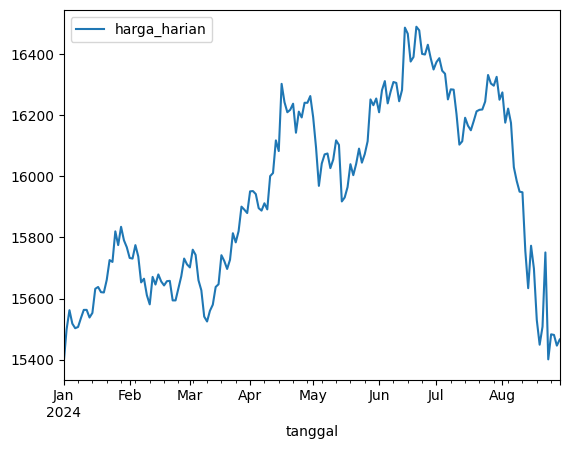

In [32]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

<Axes: xlabel='tanggal'>

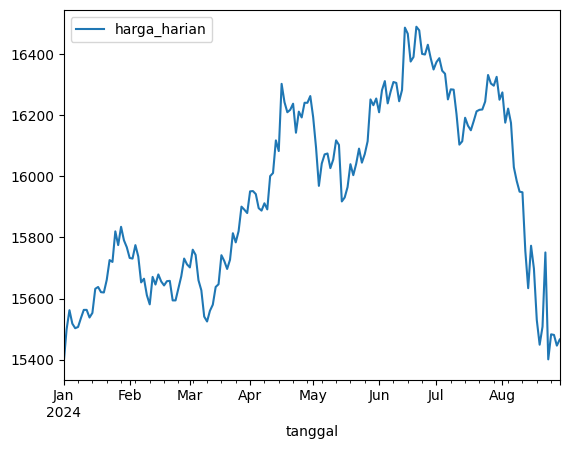

In [38]:
df.plot()

<Axes: xlabel='month_name'>

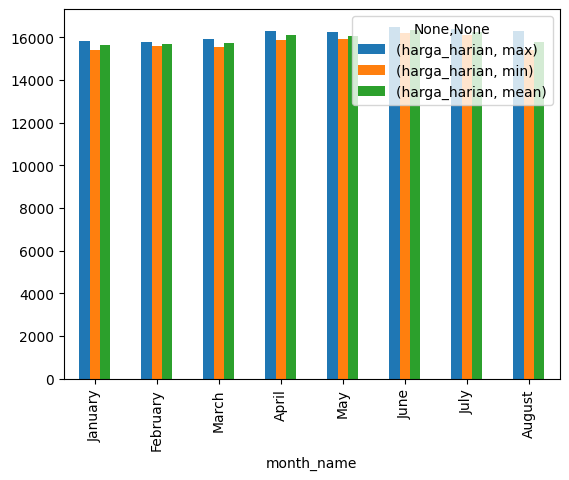

In [54]:
summary_df.plot.bar()

In [50]:
# Calculate min, max, and mean for 'harga_harian'
min_harga = df['harga_harian'].min()
max_harga = df['harga_harian'].max()
max_pos = df['harga_harian'].idxmax()
mean_harga = df['harga_harian'].mean()

print(f"Minimum harga_harian tahun 2024: {min_harga}")
print(f"Maximum harga_harian tahun 2024: {max_pos,max_harga}")
print(f"Mean harga_harian tahun 2024: {mean_harga:.2f}")

Minimum harga_harian tahun 2024: 15390
Maximum harga_harian tahun 2024: (Timestamp('2024-06-20 00:00:00'), 16490)
Mean harga_harian tahun 2024: 15943.91


## Analysis

1. Rupiah mengalami pelemahan paling dalam terjadi dibulan Juni 20224
2. harga 1 dolar berkisar antara 15390 s/d 16490

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.